In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils.vis_utils import plot_model


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


def mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
  err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
  err /= float(imageA.shape[0] * imageA.shape[1])
# return the MSE, the lower the error, the more "similar"
# the two images are
  return err

In [2]:
noise_factor = 0.1

x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1423
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1034
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0971
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0939
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0920
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0907
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0897
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0889
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0882
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0874


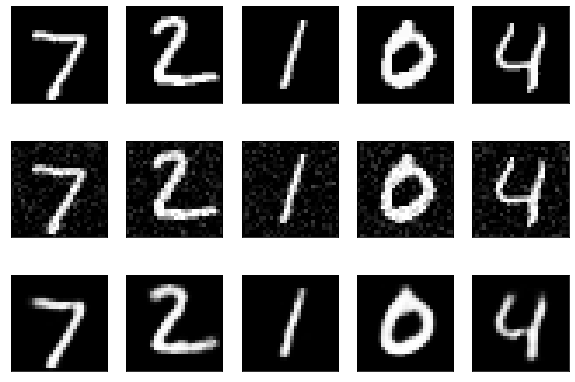

In [3]:
n = 5
plt.figure(figsize=(10, 7))
images = autoencoder.predict(x_test_noisy)
for i in range(n):
# plot original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [4]:
foo_0 = []
for i in range(0,10):
  res  = mse(x_test[i].reshape(28,28),images[i].reshape(28, 28))
  foo_0.append(res)
print (foo_0)

[0.0036849726581840918, 0.010281459768857866, 0.00178021099362047, 0.009768504458729626, 0.007060821863591353, 0.001399010225222165, 0.012556404339133452, 0.014438147514427192, 0.012881224500548426, 0.006856966403254164]


In [5]:
noise_factor = 0.2

x_train_noisy_1 = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy_1 = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy_1 = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy_1 = np.clip(x_test_noisy, 0.0, 1.0)


input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy_1, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1433
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1042
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0979
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0947
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0924
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0911
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0901
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0894
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0884


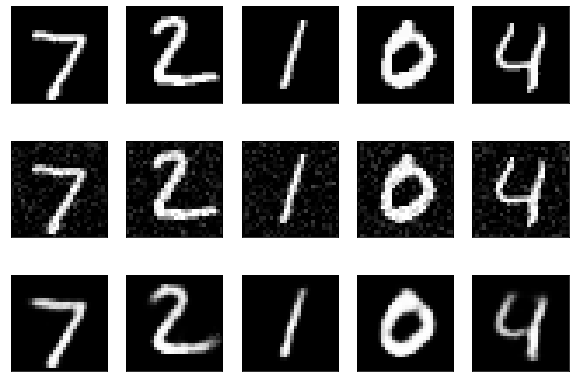

In [6]:
n = 5
plt.figure(figsize=(10, 7))
images_1 = autoencoder.predict(x_test_noisy)
for i in range(n):
# plot original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_noisy_1[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(images_1[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [7]:
foo_1 = []
for i in range(0,10):
  res  = mse(x_test[i].reshape(28,28),images_1[i].reshape(28, 28))
  foo_1.append(res)
print (foo_1)

[0.003250863592834222, 0.010303319152399997, 0.0015041488633944489, 0.00920944716097753, 0.007816529320744487, 0.0014293006858322856, 0.012604317456567092, 0.016310792871898967, 0.0159970799184691, 0.007196081685634044]


In [8]:
noise_factor = 0.3

x_train_noisy_2 = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy_2 = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy_2 = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy_2 = np.clip(x_test_noisy, 0.0, 1.0)


input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy_2, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1435
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1069
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1015
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0986
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0967
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0954
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0944
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0936
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0930
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0925


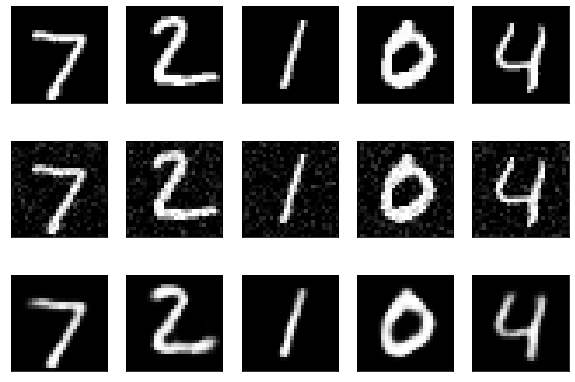

In [9]:
n = 5
plt.figure(figsize=(10, 7))
images_2 = autoencoder.predict(x_test_noisy)
for i in range(n):
# plot original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_noisy_2[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(images_2[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [10]:
foo_2 = []
for i in range(0,10):
  res  = mse(x_test[i].reshape(28,28),images_2[i].reshape(28, 28))
  foo_2.append(res)
print (foo_2)

[0.003427274581733218, 0.014529006100289546, 0.0013997235631379309, 0.007462131861845817, 0.0068011929983595705, 0.0019143383681996637, 0.012939007231053491, 0.02361045797766409, 0.016664402780682614, 0.009016177040413256]


In [11]:
noise_factor = 0.4

x_train_noisy_3 = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy_3 = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy_3 = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy_3 = np.clip(x_test_noisy, 0.0, 1.0)


input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy_3, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1401
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1024
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0974
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0947
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0929
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0917
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0907
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0899
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0893
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888


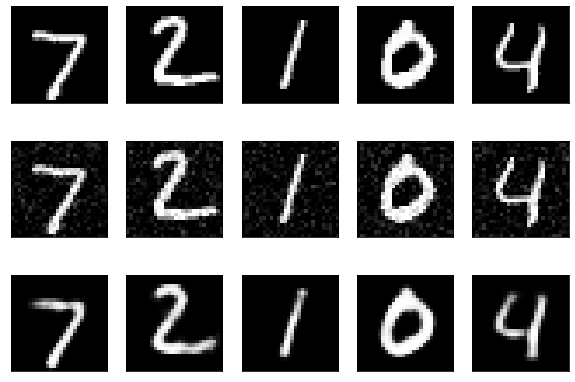

In [12]:
n = 5
plt.figure(figsize=(10, 7))
images_3 = autoencoder.predict(x_test_noisy)
for i in range(n):
# plot original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_noisy_3[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(images_3[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [13]:
foo_3 = []
for i in range(0,10):
  res  = mse(x_test[i].reshape(28,28),images_3[i].reshape(28, 28))
  foo_3.append(res)
print (foo_3)

[0.0052184942319346405, 0.010379691595317207, 0.0017236033177279804, 0.006866561786599611, 0.006674846023183517, 0.001569155343993513, 0.010454614620176692, 0.014857680359428735, 0.013662350192686409, 0.006165193650004296]


In [14]:
noise_factor = 0.5

x_train_noisy_4 = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy_4 = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy_4 = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy_4 = np.clip(x_test_noisy, 0.0, 1.0)


input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy_4, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1418
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1056
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0998
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0970
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0952
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0940
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0930
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0922
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0916
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0909


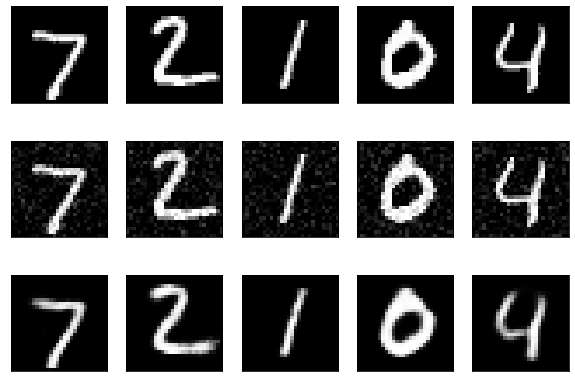

In [15]:
n = 5
plt.figure(figsize=(10, 7))
images_4 = autoencoder.predict(x_test_noisy)
for i in range(n):
# plot original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_noisy_4[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(images_4[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [16]:
foo_4 = []
for i in range(0,10):
  res  = mse(x_test[i].reshape(28,28),images_4[i].reshape(28, 28))
  foo_4.append(res)
print (foo_4)

[0.0035226324814786754, 0.01248664946692209, 0.0017509136062573997, 0.008627718802840701, 0.006971329563537091, 0.002250531891593766, 0.012624567182256694, 0.01673701374345352, 0.017603080516732452, 0.007357153797474843]


In [17]:
noise_factor = 0.6

x_train_noisy_5 = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy_5 = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy_5 = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy_5 = np.clip(x_test_noisy, 0.0, 1.0)


input_size = 784
hidden_size = 128
code_size = 32


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy_5, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1425
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1061
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1010
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0979
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0955
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0940
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0931
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0923
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0916
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0911


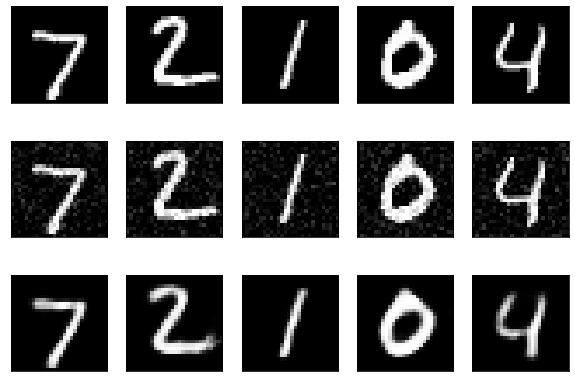

In [18]:
n = 5
plt.figure(figsize=(10, 7))
images_5 = autoencoder.predict(x_test_noisy)
for i in range(n):
# plot original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_noisy_5[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# plot noisy image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(images_5[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [19]:
foo_5 = []
for i in range(0,10):
  res  = mse(x_test[i].reshape(28,28),images_5[i].reshape(28, 28))
  foo_5.append(res)
print (foo_5)

[0.004017315700363803, 0.01261423134801629, 0.0018999263676412828, 0.010071959121960688, 0.007602887345736434, 0.001885346241354171, 0.015113371205243595, 0.017019037780556547, 0.012726886445025579, 0.008166246012084039]


In [20]:
print (foo_0)
print (foo_1)
print (foo_2)
print (foo_3)
print (foo_4)
print (foo_5)

[0.0036849726581840918, 0.010281459768857866, 0.00178021099362047, 0.009768504458729626, 0.007060821863591353, 0.001399010225222165, 0.012556404339133452, 0.014438147514427192, 0.012881224500548426, 0.006856966403254164]
[0.003250863592834222, 0.010303319152399997, 0.0015041488633944489, 0.00920944716097753, 0.007816529320744487, 0.0014293006858322856, 0.012604317456567092, 0.016310792871898967, 0.0159970799184691, 0.007196081685634044]
[0.003427274581733218, 0.014529006100289546, 0.0013997235631379309, 0.007462131861845817, 0.0068011929983595705, 0.0019143383681996637, 0.012939007231053491, 0.02361045797766409, 0.016664402780682614, 0.009016177040413256]
[0.0052184942319346405, 0.010379691595317207, 0.0017236033177279804, 0.006866561786599611, 0.006674846023183517, 0.001569155343993513, 0.010454614620176692, 0.014857680359428735, 0.013662350192686409, 0.006165193650004296]
[0.0035226324814786754, 0.01248664946692209, 0.0017509136062573997, 0.008627718802840701, 0.006971329563537091, 0

In [21]:
Y_ray= []
for i in range (len(foo_0)):
  Y_ray.append(i)

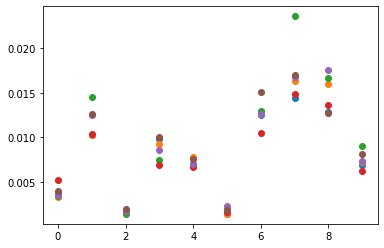

In [22]:
plt.scatter(Y_ray,foo_0)
plt.scatter(Y_ray,foo_1)
plt.scatter(Y_ray,foo_2)
plt.scatter(Y_ray,foo_3)
plt.scatter(Y_ray,foo_4)
plt.scatter(Y_ray,foo_5)

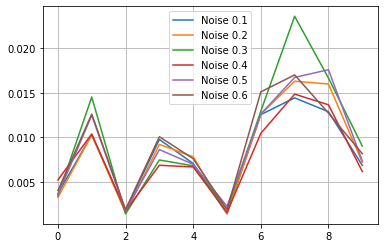

In [25]:
plt.plot(Y_ray,foo_0,label='Noise 0.1')
plt.plot(Y_ray,foo_1,label='Noise 0.2')
plt.plot(Y_ray,foo_2,label='Noise 0.3')
plt.plot(Y_ray,foo_3,label='Noise 0.4')
plt.plot(Y_ray,foo_4,label='Noise 0.5')
plt.plot(Y_ray,foo_5,label='Noise 0.6')
plt.legend()
plt.grid(True)